# Convolutional Neural Network

* MNIST data
* Convolution Layer
* Pooling Layer

## 1. Settings

### 1-1 Import required libraries

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

### Torchvision? [pypi.org](https://pypi.org/project/torchvision/0.1.8/)

1. vision.datasets : Data loaders for popular vision datasets
2. vision.models : Definitions for popular model architectures, such as AlexNet, VGG, and ResNet and pre-trained models.
3. vision.transforms : Common image transformations such as random crop, rotations etc.
4. vision.utils : Useful stuff such as saving tensor (3 x H x W) as image to disk, given a mini-batch creating a grid of images, etc.

## 2. Data

### 2-1 Download Data

In [2]:
mnist_train = dset.MNIST("./",train = True, transform = transforms.ToTensor(), target_transform = None, download=True)

### MNIST [pypi.org](https://pypi.org/project/torchvision/0.1.8/#mnist)

1. dset.MNIST(root, train=True, transform=None, target_transform=None, download=False)

2. root: root directory of dataset where processed/training.pt and processed/test.pt exist

3. train: True - use training set, False - use test set.

4. transform: transform to apply to input images

5. target_transform: transform to apply to targets (class labels)

6. download: whether to download the MNIST data



### 2-2 Item

In [3]:
print(mnist_train)

# dataset.__getitem__(idx)
image, label = mnist_train.__getitem__(0)
print(image.size(), label)

#dataset[idx]
image, label = mnist_train[0]
print(image.size(), label)

torch.Size([1, 28, 28]) tensor(5)
torch.Size([1, 28, 28]) tensor(5)


In [4]:
#튜플 형태로 (MNIST Data, Label) 반환함 
mnist_train[0]

(tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.000

In [5]:
mnist_train[0][0]

tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0

### 2-3 Length

In [6]:
# dataset.__len__()
print(mnist_train.__len__())

# len(dataset)
len(mnist_train)

60000


60000

### 2-4 Show Image

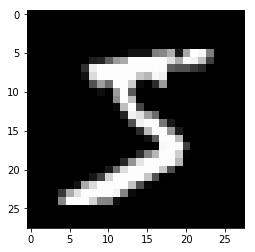

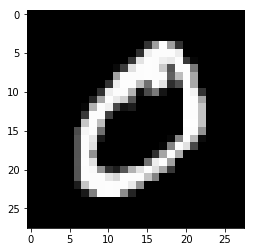

In [7]:
import numpy as np
for i in range(2):
    img = mnist_train[i][0].numpy()
    plt.imshow(img[0], cmap='gray')
    plt.show()

## 3. Convolution Layers

* torch.nn.Conv2d
* Channels
* Kernel size
* Stride
* Padding
* [Batch, Channel, Height, Width]

## 3-1 Channels

torch.Size([1, 1, 28, 28])
torch.Size([1, 3, 28, 28])


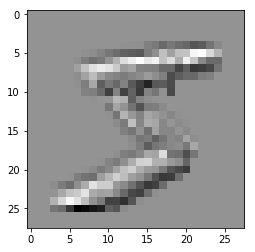

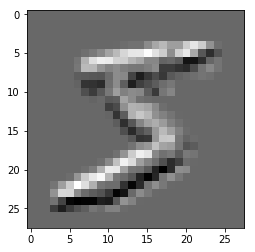

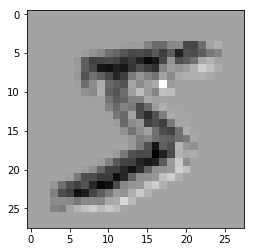

In [29]:
image, label = mnist_train[0]
# tensor.view method is to reshape a tensor 
# -1?: https://stackoverflow.com/questions/50792316/what-does-1-mean-in-pytorch-view
image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=1)
output = conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
    plt.show()

## 3-2 Kernel_Size

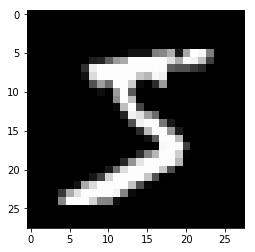

torch.Size([1, 3, 28, 28])


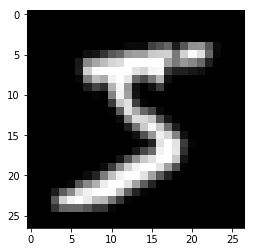

torch.Size([1, 3, 27, 27])


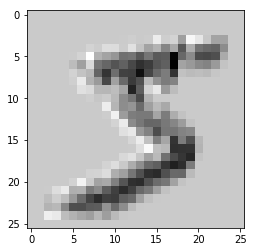

torch.Size([1, 3, 26, 26])


In [34]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=1)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(), cmap="gray")
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=2)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(), cmap="gray")
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(), cmap="gray")
plt.show()
print(output.size())


## 3-3 Stride

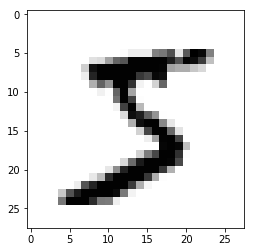

torch.Size([1, 3, 28, 28])


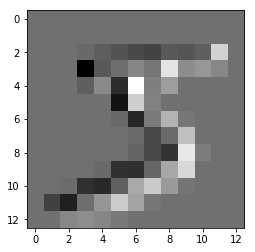

torch.Size([1, 3, 13, 13])


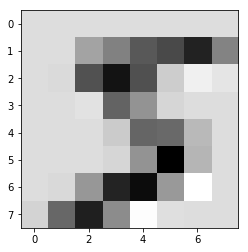

torch.Size([1, 3, 8, 8])


In [35]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=1, stride=1)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(), cmap="gray")
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3,stride=2)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(), cmap="gray")
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=3)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(), cmap="gray")
plt.show()
print(output.size())

## 3-4 Padding

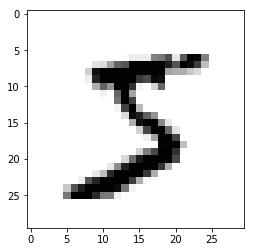

torch.Size([1, 3, 30, 30])


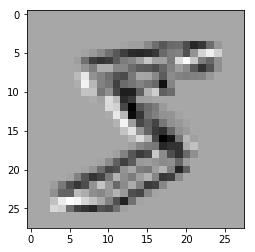

torch.Size([1, 3, 28, 28])


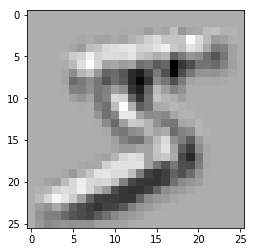

torch.Size([1, 3, 26, 26])


In [37]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=1, stride=1, padding=1)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(), cmap="gray")
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3,stride=1, padding=1)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(), cmap="gray")
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1, padding=1)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(), cmap="gray")
plt.show()
print(output.size())